In [1]:
# In Class Lab 10 
# Adding to Cosmological Tools from Lab 9

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# Lab 10 : added
# integrating tools from SciPy  
from scipy.integrate import simps

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
# Define the benchmark cosmology at z=0
# Planck 2015 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM = 0.308   # Matter Density Parameter
OmegaR = 8.24e-5  # Radiation Density Parameter
OmegaL = 0.692  # Dark Energy Density Parameter
h = 0.6781   # Hubble Constant  100 h km/s/Mpc
        

In [4]:
# Define the Einstein De Sitter cosmology at z=0
# Matter Dominates
OmegaMD = 1   # Matter Density Parameter
OmegaRD = 0  # Radiation Density Parameter
OmegaLD = 0  # Dark Energy Density Parameter


In [17]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM, OmegaR, OmegaL, h):
        # initialize the instance of the class - for any given Cosmology
        # Input:    Omega M matter density parameter
        #           Omega R radiation density parameter
        #           Omega L  dark energy density parameter
        #           h  normalization for the hubble parameter
        
        # initialize the cosmology
        self.OmegaM = OmegaM # Matter Density Parameter
        self.OmegaR = OmegaR  # Radiation Density Parameter
        self.OmegaL = OmegaL  # Dark Energy Density Parameter
        self.OmegaK = 1.0 - (OmegaM + OmegaR + OmegaL) # Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
     
        # Lab 10 added speed of light 
        self.c =  2.99792458e5*u.km/u.s    # Speed of light in km/s
    
    #################
    # Lab 9
    #################
    
    def HubbleParameterZ(self, z):
        # Function that defines the Hubble Parameter as a function of redshift
        # Input:   Redshift z 
        # Returns: The Hubble parameter at the given redshift in units of km/s/Mpc        
        
        return self.Ho*np.sqrt(self.OmegaM*(1+z)**3 + self.OmegaL + self.OmegaR*(1+z)**4 + self.OmegaK*(1+z)**2)
            
    def OmegaM_Z(self,z):
        # Function that defines the matter density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Matter Density Parameter at the given redshift.
        
        return self.OmegaM*(1+z)**3*self.Ho**2/self.HubbleParameter(z)**2
    
    
    def OmegaR_Z(self,z):
        # Function that defines the radiation density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Radiation Density Parameter at the given redshift.
        
        return self.OmegaR*(1+z)**4*self.Ho**2/self.HubbleParameter(z)**2
       
    def OmegaL_Z(self,z):
        # Function that defines the dark energy density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Dark Energy Density Parameter at the given redshift.
        
        return self.OmegaL*self.Ho**2/self.HubbleParameter(z)**2
       
        
        
    ###########################
    # Lab 10 Starts Here
    ###########################
    
    
    # Question 1 A) 
    
    def LookBackTime(self, ze):
    # Function that computes the look back time at a given redshift
    # i.e. the difference in time from when a photon was emitted to when it is observed at present day.
    # Input:    Redshift emitted (ze) 
    # Output:   Time in units of Gyr Ago  (relative to present day)    
    
        # Observed redshift  
        zo = 0
    
        # define an array with redshifts, spaced in intervals of 0.001 from zo to ze
        zrange = np.arange(zo, ze, 1e-3)

        # FILL THIS IN 
        # Define DC = 1/H(zrange)/(1+zrange)
        # But need to correct units of 1/H to be Gyr rather than seconds  
        # use the astropy.units functionality .to(units)
        Dc = ((1/self.HubbleParameterZ(zrange)).to(u.Gyr))/(1+zrange)
     
        # FILL THIS IN
        # Integrate y numerically over zrange and return in units of Gyr
        #  using simps(y(x),x)
        t = simps(Dc, zrange)*u.Gyr
        
        return t

    
    
    # Question 2 A) 
    
    def ComovingDistance(self, ze):
    # Function that returns the Comoving Distance DC
    # Distance to a galaxy that is moving with the Hubble Flow (expanding universe) at a given redshift
    # This also returns the Horizon Distance (size of observable universe) TODAY (Ro*u)
    # Input:    Redshift emitted (ze) 
    # Output:   DC in Mpc
    
        # observed redshift
        zo = 0
    
        # define an array with redshifts, spaced  in intervals of 0.001
        zrange = np.arange(zo, ze, 1e-3)
    
        # Define comoving distance
        # 1/H(zrange)*speed of light
        # FILL THIS IN
    
        # FILL THIS IN 
        # Integrate y numerically over zrange and return in units of Mpc
        # using  simps(y(x),x)
        return 
    
    
    # Question 3 A)
    
    def LuminosityDistance(self, ze): 
    # Function that computes DL, the luminosity distance of a galaxy at a given redshift
    # Distance 
    # Input:    Redshift emitted (ze) 
    # Output:   DL  in Mpc
    
        # FILL THIS IN
        # Return  DL = DC*(1+z)
        return 
    
    
    # Question 4 A)
    
    def AngularDiameterDistance(self, ze): 
    # Function that computes DA, the angular diameter distance at a given redshift
    # Physical size of angular separation of 1 degree
    # Input:   Redshift emitted (ze)
    # Output:   DA  in Mpc
        
        # FILL THIS IN
        # Return  DA = DC/(1+z) 
        return         
    
    
    # Question 4 B) 
    
    def Separation(self, ze, angle):
    # Function that uses DA to compute the physical distance corresponding to an angular separation
    # Input:    Redshift emmitted z ,  Angle between galaxies in arcsec
    # Output:  Distance in kpc
    
        # convert angle from arcsec to radians
        angleRad = (angle*u.arcsec).to(u.rad)

        # FILL THIS IN 
        # Return  separation in units of kpc
        return 
    
    
    

In [18]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology
BMCosmo = CosmologicalTools(OmegaM, OmegaR, OmegaL, h)

In [19]:
# Define here an instance of the Class Csomological Tools that follows the Einstein De Sitter Cosmology
DSCosmo = CosmologicalTools(OmegaMD, OmegaRD, OmegaLD, h)

In [20]:
# Question 1 B) 
# What is the Age of the Universe in the Benchmark Cosmology?   (use a large z)
BMCosmo.LookBackTime(1000)

<Quantity 13.794599325389484 Gyr>

In [21]:
# What is the Age of the Universe in the Einstein De Sitter Cosmology ? (use a large z)
DSCosmo.LookBackTime(1000)

<Quantity 9.612754736062262 Gyr>

# Which cosmology results in the younger universe?



In [22]:
# Question 1 C)   Plotting Look Back Time

# First we define an array of redshift for the X axis
# Define an array of redshift to some max redshift
zmax = 15
zmin = 0.001
zrange2 = np.arange(zmin, zmax, 0.01)


In [23]:
# Next we define an array of Look Back Times for the Y axis

# Create a loop to compute the Look Back time at each redshift in zrange2

# Array to store results for Benchmark Cosmology
Time = np.zeros(np.size(zrange2))

# Array to store results for Einstein De Sitter Cosmology
TimeD = np.zeros(np.size(zrange2))

i=0  # initialize the counter

while (i < np.size(zrange2)):  # set up the while loop 
    
    # Note that to store in an array need to remove the units: float(t/u.Gyr)
    
    # FILL THIS IN
    # Update the time for the Benchmark Cosmology
    Time[i] = float(BMCosmo.LookBackTime(zrange2[])/u.Gyr) 
    
    #FILL THIS IN
    # Update the time for the De Sitter Cosmology
    TimeD[i] = float(DSCosmo.LookBackTime(15)/u.Gyr) 
       
    i += 1  # increase the counter

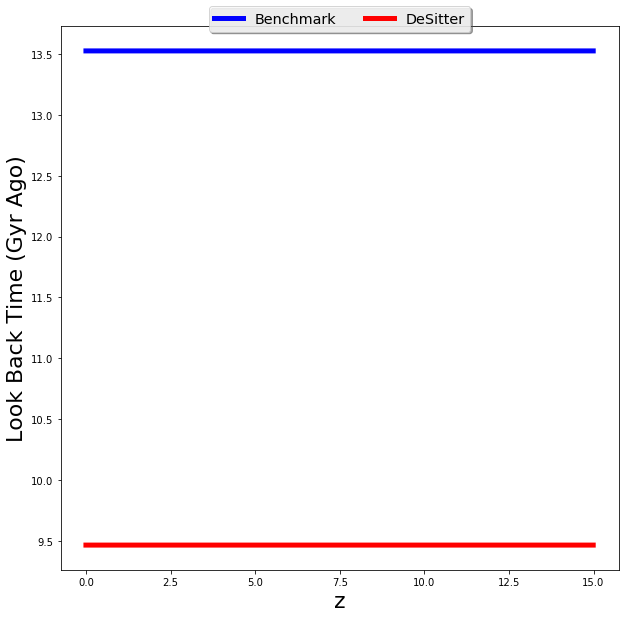

In [24]:

# Plot the Look Back Time as a Function of Redshift out to z=10
################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Look Back Time Benchmark
# FILL THIS IN
plt.plot(zrange2, Time, color='blue', linewidth=5, label='Benchmark')

# Look Back Time Einstein De Sitter
# FILL THIS IN
plt.plot(zrange2, TimeD, color='red', linewidth=5, label='DeSitter')


# Add axis labels
plt.xlabel('z', fontsize=22)
plt.ylabel('Look Back Time (Gyr Ago)', fontsize=22)

#set axis limits
#plt.ylim(0,250)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
#legend = ax.legend(loc='lower left',fontsize='x-large')

legend = ax.legend(loc='upper center', fontsize='x-large', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

# Save to a file
ax.set_rasterized(True)
plt.savefig('LookBackTime.eps', rasterized=True, dpi=350)

In [2]:
# Question 2 B)

# What is the size of the presently observable universe in the Benchmark cosmology ? (pick a large z)
# this is the size assuming the present day scale factor 


In [3]:
# What is the size of the presently observable universe in the Einstein De Sitter cosmology? (pick a large z)


# Which cosmology results in a smaller universe?



In [10]:
# Question 3 B) 

# Luminosity distances are used to measure distances and infer redshifts for standard candles. 

# Consider that you observe a Type Ia Supernova with an apparent magnitude, m = 25.1
# Absolute magnitude of a Type Ia Supernova is -19.3±0.03 

# Using the Benchmark cosmology, determine this Supernova's redshift

# First What is the Luminosity Distance? 
# m-M = 5*log(DL/Mpc) + 25




In [11]:
# Now reverse engineer the problem. What redshift gives you the right answer? 
# in reality the redshift is determined by identifying the redshift of the host.  


In [12]:
# What is the proper distance to this supernova? 


In [13]:
# Question 4 C)  

# Angle = Size/DA
# What is the separation between two galaxies separated by 1 arcsec at z=1 in the Benchmark Cosmology



In [15]:
# Question 5 

# Plotting the all of the various distance scales 

# Define Arrays to store results for Benchmark Cosmology
Comoving = np.zeros(np.size(zrange))
Luminosity = np.zeros(np.size(zrange))
Angular = np.zeros(np.size(zrange))

i=0  # initialize the counter

while (i < np.size(zrange)):  # set up the while loop 
    
    # Note that to store in an array need to remove the units.
    
    # Add the distances for the Benchmark Cosmology
    # Comoving[i] = float(DC/u.Mpc) 
    Comoving[i] =  
    Luminosity[i] =  
    Angular[i] =  

    i += 1  # increase the counter




SyntaxError: invalid syntax (<ipython-input-15-4500e8963d9c>, line 18)

In [14]:

# Plot the Distance as a Function of Redshift out to z=15
################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Comoving Distance
# FILL THIS IN
plt.loglog(, color='blue', linewidth=5, label='Comoving Distance')

# Luminosity Distance
# FILL THIS IN
plt.loglog(, color='red', linewidth=5, label='Luminosity Distance')

# Angular Diameter Distance
# FILL THIS IN
plt.loglog(, color='green', linewidth=5, label='Angular Diameter Distance')



# Add axis labels
plt.xlabel('z', fontsize=22)
plt.ylabel('Distance (Mpc)', fontsize=22)

#set axis limits
plt.xlim(0.01,15)
plt.ylim(0,20000)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper left', fontsize='x-large')

# Save to a file
ax.set_rasterized(True)
plt.savefig('CosmologicalDistancesBenchmark.eps', rasterized=True, dpi=350)


SyntaxError: invalid syntax (<ipython-input-14-8ee02c1f06e1>, line 11)